In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import os
from os import path 
from time import time
import random
import json

In [2]:
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "TRAS.settings")
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

import django
django.setup()

from django.core.exceptions import ObjectDoesNotExist
from django.db import transaction
from django.conf import settings
from django_pandas.io import read_frame

from asgiref.sync import sync_to_async

from proto.models import Attraction, Review

KeyError: 'SECRET_KEY'

In [3]:
from nltk.tokenize import RegexpTokenizer
from nltk import tokenize 
from nltk import Text
from nltk.corpus import stopwords

import nltk

In [4]:
from gensim.summarization.summarizer import summarize

In [5]:
retokenize = RegexpTokenizer("[\w]+")

In [6]:
attr_qs = Attraction.objects.all()
review_qs = Review.objects.all()

In [25]:
#Attractions_df = read_frame(attr_qs)
#All_reviews_df = read_frame(review_qs)
#Attractions_df.index = Attractions_df['id']
#All_reviews_df.index = All_reviews_df['id']
Attractions_df.iloc[:,2:].to_csv('Attractions.csv')
All_reviews_df.iloc[:,2:].to_csv('All_reviews.csv')

In [5]:
Attractions_df = pd.read_csv("Attractions.csv", index_col = 0)
All_reviews_df = pd.read_csv('All_reviews.csv', index_col = 0)

In [196]:
All_reviews_df.head()

,attraction,star,title,text,date,travelertype
id,,,,,,
1,Gyeongbokgung Palace,5,"Fantastic area, don t miss",I had the chance to visit the site after a bus...,2019-12-01,NaN
2,Gyeongbokgung Palace,4,Pretend you're in a period K-drama,Rent a hanbok and soak in the ancient Joseon v...,2019-10-01,NaN
3,Gyeongbokgung Palace,4,Love to See and Feel the History,Walking around the palace is a unique experien...,2020-02-01,NaN
4,Gyeongbokgung Palace,5,What an experience,We had a layover in South Korea and decided to...,2020-02-01,NaN
5,Gyeongbokgung Palace,5,good to visit,you can see the blue house in this area and th...,2020-02-01,NaN


In [292]:
raw_text = " ".join(reviews_35_df[reviews_35_df['attraction'].isin(cluster_dict[3])]['text'])

In [293]:
stop_words = set(stopwords.words('english')) 
stop_words = stop_words|set(['.', ',', 'the', "'s"])


NUMBER = 5000


In [294]:
lower_text =raw_text.lower()

pre_token = ngram_tokenizer.tokenize(lower_text)
token = [a_token for a_token in pre_token if a_token not in stop_words]

text = Text(token)
fd = text.vocab()

dict_5000 = {word:i for (word, i) in zip(fd, range(len(fd))) if i < NUMBER}

In [295]:
def pre_process(Reviews_df):
    star_list = list(Reviews_df['star'])
    text_list = list(Reviews_df['text'])
    
    neg_length = star_list.count(3) + star_list.count(2) + star_list.count(1)
    
    pos_text = []
    pos_star = []
    neg_text = []
    neg_star = []
    
    for text, star in zip(text_list, star_list):
        tokens = ngram_tokenizer.tokenize(text)
        processed_list = []
        for token in tokens:
            if token in dict_5000:
                processed_list.append(dict_5000[token])
        
        if star > 4:
            pos_star.append(1)
            pos_text.append(processed_list)
        else:
            neg_star.append(0)
            neg_text.append(processed_list)
        
    result_text = pos_text + neg_text
    result_star = pos_star + neg_star
        
    X = np.array(result_text)
    Y = np.array(result_star)
    return X, Y

In [296]:
X_head, Y_head = pre_process(All_reviews_df.head())
print(X_head)
Y_head

[list([1020, 3851, 1512, 48, 403, 3478, 1747, 122, 29, 107, 1180, 3728, 4527, 94, 4758, 631, 349])
 list([172, 709, 164, 337, 1118, 517, 352, 100, 57, 2714, 1262, 742, 1066])
 list([14, 342, 137, 265, 570, 1506, 196, 22, 10, 411, 3540, 2539, 14, 342, 137, 132, 318, 444, 2486, 2671, 1061, 84, 2479, 444, 2486])
 list([4, 1971, 1, 3858, 1389, 118, 5, 14, 238, 4427, 400, 1612, 37, 286, 4, 143, 227, 861, 1807, 1, 21, 752, 5, 290, 82, 169, 1819, 523, 2243, 612, 2478, 3284, 3250, 2459, 829, 766, 2686])
 list([153, 3858, 10, 223, 40, 2222, 3944, 28, 2278, 719, 1991, 93, 4068])]


array([1, 1, 1, 0, 0])

In [215]:
cluster_dict = {5: ['Gyeongbokgung Palace',
  'Changdeokgung Palace',
  'Jogyesa Temple',
  'Bongeunsa Temple',
  'Dongdaemun Gate (Heunginjimun)',
  'The Story of King Sejong & The Story of Admiral Yi Sunshin',
  'Unhyeongung',
  'Seoul Folk Flea Market',
  'Tapgol Park',
  'Gyeonghuigung Palace',
  'Deoksugung',
  'Myeong-dong Cathedral',
  'Lotte World Aquarium',
  'Grevin Museum',
  'Seoul Museum of History',
  'Seoullo 7017',
  'Seoul World Cup Stadium',
  'Ihwa Mural Village',
  'Yongma Land',
  'Cheongwadae Sarangchae',
  'The Blue House (Cheong Wa Dae)'],
 7: ['Bukhansan National Park',
  'Hangang Park',
  'Namsan Park',
  'Cheonggyecheon Stream',
  'Haneul Park',
  'Seoul Forest',
  'Yeouido Hangang Park',
  'Bugaksan Seoul Fortress',
  'Yongsan Family Park',
  'Dream Forest',
  'Seoul National Cemetery',
  'Ttukseom Hangang Park',
  'Eungbongsan Mountain',
  'Ansan Jarak-gil',
  'An Jung-geun Memorial Hall',
  'Sebitseom',
  "Jeoldusan Martyrs' Shrine",
  'Paradise Casino Walkerhill',
  'Naksan Public Art',
  'Figure Museum',
  'Children’s Museum of National Museum of Korea',
  'Yeouido Park',
  'Coex Aquarium',
  'Itaewon',
  'Naksan Park',
  'Inwangsan Mountain',
  'Hongdae Art Market Free Market',
  'Seoul Central Mosque',
  'Dongdaemun History & Culture Park',
  'Stylenanda Pink Hotel Flagship Store',
  'Seoul Arts Center',
  'Express Bus Terminal Shopping Center',
  'Hongdae NANTA Theatre',
  "Ewha Woman's University"],
 1: ['Myeongdong Shopping Street',
  'Insadong',
  'Bukchon Hanok Village',
  'Hongik University Street',
  'Ewha Womans University',
  'Korea University',
  'Hongik University',
  'Namsangol Hanok Village',
  'Namdaemun Market',
  'Korea House',
  'Majang Meat Market',
  'National Museum of Modern and Contemporary Art Seoul',
  'Gwanghwamun Square',
  'Alive Museum Insadong',
  'Mangwon Market',
  'Lotte World Folk Museum',
  'Seonyudo Park'],
 3: ['The War Memorial of Korea',
  'National Museum of Korea',
  'Dongdaemun Design Plaza (DDP)',
  'Leeum Samsung Museum of Art',
  'Korean Postage Stamp Museum',
  'D Museum',
  'Gilsangsa Shrine',
  'National Hangeul Museum',
  'Kwanghee Fasion Mall',
  'Tourist Information Center of Korea Tourism Organization',
  'Seoul Museum of Art',
  'Seoul City Wall Museum',
  'Kukkiwon World Taekwondo Headquarters',
  'Culture Station Seoul 284',
  'KBS On',
  'Gyeongui line forest',
  'Amore Pacific Museum of Art',
  "Baek In-je's House",
  "Yangjae Citizens' Park",
  'Seocho Tourist Information Center',
  'Daelim Museum',
  'Lotte FitIn',
  'Seven Luck Casino Gangnam Coex',
  "Seoul Children's Grand Park",
  'Jamsil Baseball Stadium',
  'Lotte World',
  'Ikseon-dong Hanok Street',
  'GOTO Mall',
  'Jungbu Market',
  'Sinchon',
  'Dongdaemun Shopping Complex',
  'Gocheok Sky Dome',
  'IFC Mall',
  'SRT',
  'Seoul Daehangno',
  'Namsan Cable Car',
  'Hyundai Department Store Apgujeong Main'],
 2: ['Trickeye Museum Seoul',
  'Lotte World Tower & Mall',
  'N Seoul Tower',
  'Love Museum',
  'Seoul Sky',
  'Star Avenue at Lotte World',
  'Statue of Gangnam Style',
  'Jeongdong Observatory',
  'Seoul Plaza',
  'Ice Gallery',
  'Olympic Park',
  'Changgyeonggung Palace',
  'Starfield COEX Mall',
  'Garosu-gil',
  'Jongmyo Shrine',
  'Seokchon Lake',
  'Lotte Department Store Main',
  '63 City',
  'Garak Market'],
 0: ['KTX (Korea Train Express)',
  'Starfield Library',
  'Doota',
  'apm Place',
  'Migliore Dongdaemun Shop',
  'Lotte Young Plaza Myeongdong',
  'Shinsegae Gangnam',
  'I-Park Mall',
  'Mecenatpolis Mall',
  'Myeongdong Underground Shopping Center',
  'Dongdaemun Seonggwak Park',
  'Mario outlet',
  'Seodaemun Museum of Natural History',
  'Gwanghwamun Gate',
  'Samcheongdong-gil Road',
  'Seoul City Wall',
  'Seoul City Hall',
  'Seolleung & Jeongneung Royal Tomb',
  'Samcheonggak',
  'Seoul International Fireworks Festival',
  'Seoul Botanical Garden',
  'National Museum of Korean Contemporary History',
  'Kyunghee University Seoul Campus',
  'Common Ground',
  'Statue of Admiral Yi Sun-Sin',
  "The War and Women's Human Rights Museum",
  'Jeongdong Theater',
  'Sungnyemun Gate'],
 4: ['Seoul Metro',
  'Kwangjang Market',
  'Seven Luck Casino Gangbuk Hilton',
  'L’atelier',
  'Dosan Neighborhood Park',
  'Seodaemun Prison History Hall',
  'Seoul Lantern Festival',
  'Shinsegae Dept. Store Main',
  'National Palace Museum of Korea',
  'Times Square Mall',
  'Statue of Sejong the Great',
  'Noryangjin Fisheries Wholesale Market',
  'Korea Furniture Museum',
  'Lotte Outlets Seoul Station'],
 6: ['Myeongdong NANTA Theater',
  'National Folk Museum of Korea',
  'Poopoo Land',
  'Arario Museum in Space',
  'Grilled Fish Street in Dongdaemun Market',
  'D-Cube City']}

In [187]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

In [311]:
cluster_dict[3]

['The War Memorial of Korea',
 'National Museum of Korea',
 'Dongdaemun Design Plaza (DDP)',
 'Leeum Samsung Museum of Art',
 'Korean Postage Stamp Museum',
 'D Museum',
 'Gilsangsa Shrine',
 'National Hangeul Museum',
 'Kwanghee Fasion Mall',
 'Tourist Information Center of Korea Tourism Organization',
 'Seoul Museum of Art',
 'Seoul City Wall Museum',
 'Kukkiwon World Taekwondo Headquarters',
 'Culture Station Seoul 284',
 'KBS On',
 'Gyeongui line forest',
 'Amore Pacific Museum of Art',
 "Baek In-je's House",
 "Yangjae Citizens' Park",
 'Seocho Tourist Information Center',
 'Daelim Museum',
 'Lotte FitIn',
 'Seven Luck Casino Gangnam Coex',
 "Seoul Children's Grand Park",
 'Jamsil Baseball Stadium',
 'Lotte World',
 'Ikseon-dong Hanok Street',
 'GOTO Mall',
 'Jungbu Market',
 'Sinchon',
 'Dongdaemun Shopping Complex',
 'Gocheok Sky Dome',
 'IFC Mall',
 'SRT',
 'Seoul Daehangno',
 'Namsan Cable Car',
 'Hyundai Department Store Apgujeong Main']

In [298]:
reviews_35_df = All_reviews_df[All_reviews_df['star'] != 4]
cluster_n_df = reviews_35_df[reviews_35_df['attraction'].isin(cluster_dict[3])]

In [299]:
X, Y = pre_process(cluster_n_df)

In [300]:
X_padded = pad_sequences(X, maxlen=100)

from numpy import savetxt
# define data
# save to csv file
savetxt('X.csv', X_padded, delimiter=',')
savetxt('Y.csv', Y, delimiter=',')

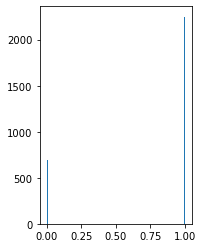

In [301]:
Y_result = [s for s in Y]

plt.subplot(1,2,1)
plt.hist(Y_result, bins=100)
plt.show()

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [304]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [305]:
model = Sequential()

# 단어를 읽어오는 세포 5천개

model.add(Embedding(NUMBER, 120))
# 단어 하나마다 세포가 하나씩
# 단어들을 120개로 임베딩딩
model.add(Dropout(0.3))
# LSTM
model.add(LSTM(120))
model.add(Dropout(0.3))
#DropOut으로 랜덤으로 노드를 꺼줌으로서, 과적합을 방지

# 은닉층...
model.add(Dense(1, activation='sigmoid'))

In [306]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [308]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=64, callbacks=[es, mc])

Epoch 1/4
37/37 [==============================] - ETA: 0s - loss: 0.0378 - acc: 0.9890
Epoch 00001: val_acc improved from 0.81695 to 0.82373, saving model to best_model.h5
37/37 [==============================] - 5s 144ms/step - loss: 0.0378 - acc: 0.9890 - val_loss: 0.7968 - val_acc: 0.8237
Epoch 2/4
37/37 [==============================] - ETA: 0s - loss: 0.0124 - acc: 0.9975
Epoch 00002: val_acc did not improve from 0.82373
37/37 [==============================] - 5s 134ms/step - loss: 0.0124 - acc: 0.9975 - val_loss: 0.9854 - val_acc: 0.8186
Epoch 3/4
37/37 [==============================] - ETA: 0s - loss: 0.0058 - acc: 0.9992
Epoch 00003: val_acc did not improve from 0.82373
37/37 [==============================] - 5s 132ms/step - loss: 0.0058 - acc: 0.9992 - val_loss: 0.9744 - val_acc: 0.8153
Epoch 00003: early stopping


In [253]:
def top_low_n(name, n = 3):
    
    the_attraction_df = All_reviews_df[All_reviews_df['attraction']==name]

    if len(the_attraction_df) > 1000:
        pos_series = the_attraction_df[the_attraction_df['star']==5]['text'][::10]
    elif len(the_attraction_df) > 300:
        pos_series = the_attraction_df[the_attraction_df['star']==5]['text'][::3]
    else:
        pos_series = the_attraction_df[the_attraction_df['star']==5]['text']
    neg_series = the_attraction_df[the_attraction_df['star']<=3]['text']
    neu_series = the_attraction_df[the_attraction_df['star']==4]['text']
    
    pos_sample = sample_n(pos_series, n = 3, positive=True)
    if len(neg_series) > 3:
        neg_sample = sample_n(neg_series, n = 3, positive=False)
    elif len(neu_series) > 3:
        neg_sample = sample_n(neu_series, n = 3, positive=False)
    else:
        neg_sample = []
    
    return json.dumps({"pos":pos_sample, "neg":neg_sample})

    
def sample_n(pn_series, n = 3, positive=True):
    pn_text = " ".join(pn_series)
     
    pn_sent_n = pn_text.count(".")
    
    pn_result = summarize(pn_text, ratio = 50/pn_sent_n)
    
    pn_sentence_list = [t.replace('\n','') for t in pn_result.split(".") if t != '' ]
     
    result_sentences = []
    for sentence in pn_sentence_list:
        tokens = ngram_tokenizer.tokenize(sentence)
        processed_list = []
        for token in tokens:
            if token in dict_5000:
                processed_list.append(dict_5000[token])
        result_sentences.append(processed_list)

    X_sentence = np.array(result_sentences)
    X_sentence = pad_sequences(X_sentence, maxlen=max_len)

    prediction_list = model.predict(X_sentence)

    sent_predict_df = pd.DataFrame([(sentence, prediction) for sentence, prediction in zip(pn_sentence_list, prediction_list)]).sort_values(by = 1)
    
    pn_sample = []    
    
    if positive:
        tail = sent_predict_df.tail(15)
        for star, sentence in zip(tail[1],tail[0]):
            if star > 0.9 and sentence not in pn_sample and len(pn_sample) < n and len(sentence) < 200:
                pn_sample.append(sentence)
                print(star, "  :  ", sentence)
    else:
        head = sent_predict_df.head(15)
        for star, sentence in zip(head[1],head[0]):
            if star < 0.3 and sentence not in pn_sample and len(pn_sample) < n and len(sentence) < 200:
                pn_sample.append(sentence)
                print(star, "  :  ", sentence)
    
    return pn_sample

In [310]:
top_low_n('Coex Aquarium')

[0.9990058]   :   Would definitely recommend a visit if you like sea creatures
[0.999153]   :   We really enjoyed the exhibits with the fish in random object such as a coke machine, and a fridge
[0.99938107]   :   A very worth visit!The aquarium was different form the ones I have seen in the state, the places were they keep their fish are very unique and everything seems very close you can almost touch them
[0.00823215]   :   So, if you have been before in great aquariums forget about this one, it's small and has nothing special to see and it seams that they don't take very well care about the animals there
[0.02255987]   :   It's crowded, the tanks are too small for many of the larger fish/mammals and most people are more interested in taking photos of themselves at the aquarium that actually looking at anything
[0.04791155]   :   The viewing tunnel with sharks & rays doesn't have the larger species, but there is some impressive sharks


'{"pos": ["Would definitely recommend a visit if you like sea creatures", "We really enjoyed the exhibits with the fish in random object such as a coke machine, and a fridge", "A very worth visit!The aquarium was different form the ones I have seen in the state, the places were they keep their fish are very unique and everything seems very close you can almost touch them"], "neg": ["So, if you have been before in great aquariums forget about this one, it\'s small and has nothing special to see and it seams that they don\'t take very well care about the animals there", "It\'s crowded, the tanks are too small for many of the larger fish/mammals and most people are more interested in taking photos of themselves at the aquarium that actually looking at anything", "The viewing tunnel with sharks & rays doesn\'t have the larger species, but there is some impressive sharks"]}'

In [125]:
len("The coex mall has also been upgraded, as compared to the last time I went here a long time ago, This aquarium is nothing special at all")

135

In [286]:
top_low_n("Bugaksan Seoul Fortress")

[0.9198334]   :   Depending on the route you take, it might be useful for you to bring a hiking pole as a certain section of the trek would be rather steep
[0.940451]   :   You can reach the Seoul fortress from Jongno area by foot, bus or taxi and it is simply quite stunning location
[0.96418923]   :   It should be noted that there are few signs in English , and at one point a small foot bridge is passed and a really steep staircase that when climbed takes you over the wall
[0.00119153]   :   Bus ride takes about 10 minutes, we got off on the last stop and walked from there
[0.00230181]   :   There seemed to be a few side trails but as a rule of thumb, we just followed the fortress wall
[0.0384773]   :   To get to metro station from Changuimun Gate, follow the sign to Gyeongbokgung until you reach the main road, cross the road and take bus 7022 or 7212 to Gyeongbokgung Station


'{"pos": ["Depending on the route you take, it might be useful for you to bring a hiking pole as a certain section of the trek would be rather steep", "You can reach the Seoul fortress from Jongno area by foot, bus or taxi and it is simply quite stunning location", "It should be noted that there are few signs in English , and at one point a small foot bridge is passed and a really steep staircase that when climbed takes you over the wall"], "neg": ["Bus ride takes about 10 minutes, we got off on the last stop and walked from there", "There seemed to be a few side trails but as a rule of thumb, we just followed the fortress wall", "To get to metro station from Changuimun Gate, follow the sign to Gyeongbokgung until you reach the main road, cross the road and take bus 7022 or 7212 to Gyeongbokgung Station"]}'

In [309]:
top_low_n("Seocho Tourist Information Center")

[0.99907446]   :   It was much more than a simple information centre but a whole experience
[0.9992357]   :   Not to mention, if you go upstairs you get to try traditional Korean musical instruments and dress
[0.999298]   :   The staff was very welcoming We're blessed to meet friendly and helpful customer service team, Clara/Uri


'{"pos": ["It was much more than a simple information centre but a whole experience", "Not to mention, if you go upstairs you get to try traditional Korean musical instruments and dress", "The staff was very welcoming We\'re blessed to meet friendly and helpful customer service team, Clara/Uri"], "neg": []}'

In [133]:
top_low_n("Grilled Fish Street in Dongdaemun Market")

[0.9234929]   :   Another side note,  you might want to go to a coffee shop if you need to go to the bathroom,  and not one of the fish restaurants bathroom
[0.92936134]   :   No frills, no fuss - just great grilled fish amidst the hustle and bustle of the Dongdaemun area
[0.9605285]   :   In front of the center, take the road on the left leading to Cheonggye-ro and walk 100 meters to reach the food street on the right


'{"pos": ["Another side note,  you might want to go to a coffee shop if you need to go to the bathroom,  and not one of the fish restaurants bathroom", "No frills, no fuss - just great grilled fish amidst the hustle and bustle of the Dongdaemun area", "In front of the center, take the road on the left leading to Cheonggye-ro and walk 100 meters to reach the food street on the right"], "neg": []}'

In [287]:
top_low_n("Changdeokgung Palace")

[0.9996939]   :   We got lucky and managed to get tickets for the secret garden tour at the ticket box the morning we visited
[0.99975455]   :   The guide did a wonderful job of conveying the feel of life in the palace and within the garden
[0.999762]   :   I visited the palace on an afternoon in October; the weather was perfect for a few hours outside
[0.0001677]   :   Not as beautiful as the Gyeongbokgung to be honest and you must go to the secret garden following a guife, you cannot enter by yourself and it's not worth one and half hour
[0.00034907]   :   However, my family and I found nothing special about the visit since all structures look alike and tourists cannot go inside the palace except hanging around the areas outside
[0.00050014]   :   The entry price was only 1,000 won which is cheap but for that you can’t get inside any of the buildings and when it is hot, it’s a bit relentless


'{"pos": ["We got lucky and managed to get tickets for the secret garden tour at the ticket box the morning we visited", "The guide did a wonderful job of conveying the feel of life in the palace and within the garden", "I visited the palace on an afternoon in October; the weather was perfect for a few hours outside"], "neg": ["Not as beautiful as the Gyeongbokgung to be honest and you must go to the secret garden following a guife, you cannot enter by yourself and it\'s not worth one and half hour", "However, my family and I found nothing special about the visit since all structures look alike and tourists cannot go inside the palace except hanging around the areas outside", "The entry price was only 1,000 won which is cheap but for that you can\\u2019t get inside any of the buildings and when it is hot, it\\u2019s a bit relentless"]}'

In [269]:
Attr_query = Attraction.objects.all()
update_list = []
for i, attraction in enumerate(Attr_query):
    print(attraction.name, "  start!")
    try:
        result = top_low_n(attraction.name, n = 3)
        attraction.review_sample = result
        update_list.append(attraction)
        print("End!")
    except Exception as e:
        print(e)
        continue

Gyeongbokgung Palace   start!
[0.9968972]   :   This beautiful palace was a beautiful trip through history  The English speaking tour guide was great
[0.9969977]   :   I was by myself so took my time in looking around It is large palace with different  buildings and big  park
[0.9970826]   :   Majestic place, November is the best time to visit of you want to experience cold weather
[0.00478536]   :   So it might be worth going again, but in the current state, it's a pretty large palace and a nice promenade, not much else
[0.01253822]   :   Surprisingly, the place is crowded with tourists and it was a challenge to take pictures in the Korean traditional costume
[0.03527406]   :   Pack of people taking pictures with hanbok in the front area, but if you walk more inside the complex area, there are less crowded place
End!
Bukhansan National Park   start!
[0.99418503]   :   Koreans love their hiking and this is a great place for that
[0.9945506]   :   It was definately doable, but I would h

[0.98886085]   :   To arrive close to the I SEOUL U sign, take the purple subway line (number 5) and get off the station Yeouinaru exit 2 This area at night looks always beautiful
[0.99282926]   :   Hangang Park is defintiely worth the time to check it out
[0.99379796]   :   Nice place to walk around and relax, great view
[0.00472319]   :   Seoul is sprawling with parks, and this one doesn't offer much -- it's good to visit if you're staying near the area but other the usual fare of biking, and having a picnic, there's not much
[0.01992953]   :   Nice for a stroll if you happen to be in the area, or for some cycling, but if you're on a tight schedule you can safely give this one a miss
[0.03265208]   :   If you're visiting this in the winter, you still can sit in the park for picnic but you wont get to enjoy the fountain show at night
End!
N Seoul Tower   start!
[0.9967005]   :   If time permits,have a cappuccino on the cafe located at the very top
[0.9968485]   :   Get a cable cart ri

[0.98433256]   :   The location is easily accessible by train and it is a great place to visit for both ladies and gentleman
[0.9881506]   :   And this is an absolute must place to visit for those women who love shopping for bargains and deals
[0.9893829]   :   Nice architecture of the buildings and has a good atmosphere for studying
[0.03747314]   :   Great for walking also because there are also many shop for clothes and shoes
[0.04489988]   :   This university is faamous not only for the enviroment, it is also the surrounding area has lots of restaurant and cafes as well as shops
End!
Dongdaemun Design Plaza (DDP)   start!
[0.98381877]   :   Great place to go when shopping or just hanging out looking at thousands of people passing by
[0.98458254]   :   Don’t miss the self-guided audio tour (4000 Won) with good background information on 16 stops outside A fantastic ceremony to honour those who gave their lives in the Korean War
[0.98537624]   :   Inside there is a large exhibition sp

End!
Bugaksan Seoul Fortress   start!
[0.9259833]   :   but we enjoy the view, we can see downtown seoul from the above, the long wall, the trees that start to become red, the handsome guard, we glad we did it
[0.9358763]   :   You have to show your passport or similar type of ID in order to walk the trail, but it's free and very healthy
[0.95209825]   :   Bring your passport, wear comfortable clothes (best not to wear jeans and dresses/skirts) and a good pair of walking/hiking shoes
[0.03271329]   :   There seemed to be a few side trails but as a rule of thumb, we just followed the fortress wall
End!
Korean Postage Stamp Museum   start!
[0.96890044]   :   Not only is it filled with historical information, but it is also an interactive fun place to go - especially for kids
End!
Star Avenue at Lotte World   start!
input must have more than one sentence
Migliore Dongdaemun Shop   start!
[0.93256223]   :   its heaven for toys too as the underground level is filled with Pororor's toys and 

End!
Seoul National Cemetery   start!
[0.9942275]   :   Huge cemetery and war memorial in a busy part of Seoul buffered by woodland on most sides that allow for a beautiful and sobering walk
[0.13835877]   :   I didn't realize it was a real clock!Finally, another reviewer said that the Seoul National Cemetery is near Exit 6
End!
Seoul Plaza   start!
[0.9136773]   :   I liked that is was really close to a lot of different types is restaurants and things to see
[0.9715456]   :   My second timeThe location is perfect, close to the metro station
[0.990803]   :   Temples around, great place to take pictures My second timeThe location is perfect, close to the metro station
[0.0081794]   :   This is just a big square in front of the city hall
[0.02821049]   :   However, there was absolutely nothing going on in the plaza during our visit, which was a shame
[0.0493753]   :   Seoul Plaza is a big stretch of land in front of the city hall and the Seoul Metropolitan Library
End!
Ttukseom Hangang P

[0.9497215]   :   I was very fortunate that a local Korean man saw me taking pictures and he came over and walked with me to each plaque and explained each one of them to me
[0.9616008]   :   A nice park to sit, relax and admire the history of the city
[0.9919573]   :   This location is an important part of Korean history and its struggles with Japanese occupation
[0.01024565]   :   We came across this park by accident and although there is not a lot to see, the Ten Storied Stone Pagoda of Wongaska Temple is quite amazing
[0.06301728]   :   Also within the park is a small pagoda built in the 16th century when the park was a Buddhist Temple
[0.10895807]   :   It's good to visit for a quick break when in the area and has a beautiful, interesting ten story stone pagoda
End!
Lotte FitIn   start!
local variable 'batch_outputs' referenced before assignment
Seven Luck Casino Gangnam Coex   start!
[0.9045782]   :   I was walking around the Coex last weekend and passed by this casino and outsid

[0.00272611]   :   It's nothing special, 2 minutes is enough for this place, so if you don't plan to go to the palace behind it, no need to go there
[0.09101817]   :   Other than that, nothing more to do
End!
National Folk Museum of Korea   start!
[0.98895824]   :   This is a very nice museum that shows the history and culture of Korea
[0.99018323]   :   As all Palaces are empty, this museum offers a good complement to imagine how people lived in different times and according to different social levels
[0.991199]   :   The museum gave us a glimpse of history as well as Korean everyday life
[0.00773996]   :   I imagine that for Koreans, the museum would be much more interesting
[0.03142336]   :   it was very intresting learning about the way of life years ago and how much it has changed
[0.11261475]   :   If you are in the palace, give it a go, the demonstration of Korean peoples wedding and coming of age ceremonies is intresting This is a sweet little museum
End!
Changgyeonggung Palace

[0.9875885]   :   You can enjoy street performances by local artists,  shopping in small local outlets; they sell cute stuffs like handmade bracelets, jewelry, bags, clothes, room interior stuffs
[0.9894484]   :   the street is vibrant and for those cafe-lover it is simply a must-visit if you are in seoul
[0.99091583]   :   Samcheongdong is a beautiful and quaint little neighborhood that is actually one of the oldest in Seoul
[0.03423107]   :   This street was similar to others in Bukchon but had more cafes and  places for tourists plus a mix of the old Korean houses and some new
[0.06669092]   :   Its nice to walk during autumn Tons of eateries and cafes in the main street and in the smaller alleys
[0.08702955]   :   Even when you're not into shopping, it is nice to just stroll around, people-watching while discovering interesting facades and street art
End!
Garosu-gil   start!
[0.99139047]   :   Advantages are that there are numerous small streets on either side of Dosan-Daero 13-gil

End!
National Palace Museum of Korea   start!
[0.98259544]   :   The National Palace Museum of Korea was more interesting than all of the actual palaces I visited in Seoul (except Changdeokgung) and is a truly magnificent museum
[0.987807]   :   I highly recommend a short visit to this wonderful museum on Korean history on the Gyeongbokgung Palace grounds
[0.9900006]   :   The museum definitely worth visiting and we enjoyed exploring the very interesting items exhibited overs several floor, including the royal classic cars
[0.0781692]   :   Or when there was something different there was no English explanation of it This is a good quality museum and easy to get to using the metro
End!
Hongdae Art Market Free Market   start!
[0.98917276]   :   hongdae is must visit places when you are in seoul This is probably the most energetic party of the city
[0.98952013]   :   i had so much fun hanging around in this area
[0.9915955]   :   Been here so many times A great place for shopping and enjo

[0.00333074]   :   The food court at the 63 building has some average food choices - we decided to have some Lotteria before heading on our way to our final stop - the art gallery
[0.01114836]   :   The people looking at the art were outnumbered by people looking at the view 10 to 1
[0.03611621]   :   There are a lot of things inside the building (wax museum and stuff) bit we did not go to any of those
End!
Dongdaemun History & Culture Park   start!
[0.92077446]   :   The architecture is very unusual, the excavation of the city walls is very interesting and the lit flower garden is beautiful to behold, particularly at night
[0.9317031]   :   This is a great place to see the old and new come together in Seoul
[0.9957562]   :   A park that's not only acts as a breathing space for Dongdaemun , but is also complete with a museum on the stadium and the history of the area
[0.15816267]   :   Ok for 1 hour at most just to see what's inside the building and walkaround So this place is a huge a

[0.9753239]   :   It was an interesting experience visiting here, as I got to view the Korean contemporary history from a Korean point of view
[0.98389626]   :   We wanted to know how South Korea looks into its more recent history and found a lot of very informative material
[0.9860155]   :   Try and do in the early part of your trip and perhaps before the DMZ tour
[0.02056097]   :   The Location: Subway Line 5, Gwangwamum Station, Exit 2 Many representations of everyday life of Korea is present; not very interesting though you can easily complete the museum around 2 hours
[0.0253416]   :   True, on the side street, the door is labeled clearly, but I suspect that I was not the only visitor who came on the main street from the line 5 subway station
[0.18677023]   :   Yes, the museum is clearly aimed at the Korean-speaking public; but the English labeling is reasonably well-done
End!
Express Bus Terminal Shopping Center   start!
[0.90382576]   :   Great central meeting point in Seoul A s

End!
Namsan Cable Car   start!
[0.97438806]   :   The Cable Car Station is easy to reach from Myeongdong but the road is quite an uphill, so you better use Namsan Orumi if you think it will be hard for you to walk on an uphill road
[0.9762567]   :   It might be a bit crowded, but it is worth taking the cable car in the hot summer days instead of walking to the hilltop
[0.9895313]   :   We were there on sunny Sunday (plus there was some kind of local festival in Namsan Park), so there was a lot of people and we had to wait to get into the car, but it was expected
[0.01830074]   :   While there was no queue while we visited, the ride itself (9 US$ return ticket) was not very eventful nor long
[0.02184442]   :   I visited on a weekday at around 11 am, the queue to buy the cable car ticket was long but moved quite fast
[0.03326592]   :   Namsan cable car is just a few walks away from Pacific Hotel, the road is quite uphill so I dont really suggest it to older people
End!
The War and Women'

In [270]:
Attraction.objects.bulk_update(update_list, ['review_sample'])

In [288]:
data = """Lots of clothes , socks , bags , etc . neg
2
There 's an aquarium inside too which I was really tempted to go but I 'd just eaten a bunch of sushi and did n't need a reminder that I had probably eaten Nemo . neg
3
connects two hotels . neg
2
Definitely a must see ! pos
1
We accidentally came across this mall . neu
2
Do n't get confused , Quantity does not mean either Quality or a good price . neg
3
Do not forget your camera and the volunteers in costume are very happy to get a photo with you . pos
1
This area is great for the atmosphere , hotels , and variety of different kinds of restaurants and people you will find . pos
1
Overwhelmed by Korean youngers . pos
1
At a certain fee , they can prepare the seafood you bought from the market for you . neg
1
Be sure to reach earlier if you intend to visit the zoo and the various museums there since they close pretty early . neu
2
Fast , clean , and friendly staffs . pos
1
After getting familiarized we realized that there were so all Magic tour tickets available allowing to skip the line . neg
3
Other reviews have mentioned the interactive hands free headset . pos
1
A great way to thoroughly enjoy this palace is to emerge yourself into the culture ! pos
1
The street itself also quite artsy with some mural and street performance during night . pos
1
There are a lot of shops to choose from . pos
2
Again as before , go with a guide and this palace comes to life.Be prepared to walk , the treasure is the building architecture and the history . pos
1
This branch is the Main & Biggest one . neu
2
Even you can shop some cosmetics ( which is the same store that you can find in Myeongdong ! ) pos
1
There is an old building and a new building next to each other . pos
2
However I am disappointed towards Youll . neg
3
Here we share some day & night photos shot . neu
1
They will push you to buy fresh seafood and will bring you to a bunch of restaurants upstairs and charge you exorbitantly to cook it . neg
3
Was looking forward to coming here but after marvelling at the structure and sculptures outside we were a bit bemused by the inside . neg
3
Nice place . pos
1
Overall a very nice day trip in conjunction with a walk down to Independence Park . neu
1
It 's a residence area . neg
2
I 've never been in a library that is soo huge . pos
1
It was beautifully restored and displayed . neu
1
However , if you need to buy something inside the prices are extremely reasonable . neu
1
If this was all there was in the area then it would be great , but there are some very impressive “ competitors ” nearby . neg
2
The prices are not cheap though but we order 2 set menus consisting of about 10 items which cost about Kwn69,000/- . neu
3
When we got on the bus to go to the tower , I didn ’ t realize that it was at the top of a hill/mountain so I was surprised that we didn ’ t just walk , but I was thankful as we made our way up the windy roads that walking wasn ’ t happening ! pos
1
So if you want to know the other side of Seoul that is more interesting , just stay in Hongdae ! pos
1
Worth a visit ! pos
1
Queues were small to get up and down the tower though . neu
3
? The owner gave us a shopping bag and wrote our name in korean . neg
1
Main problem anywhere in Korea is the language barrier . neu
3
You can bargain with for price . neu
2
I forgot the name . neu
2
It 's a well-planned mall for a younger audience with many amenities for events such as the Seoul St. Patty 's Day festival . neu
1
Inside the Seoul metro area I think it is very competitive with cars and riding is generally as fast as driving.English is everywhere and am English speaker can easily use the metro , though specifics like express trains and branch line service can be hard to spot without a little Korean . neu
1
Small portions , so if you have a big appetite ... ... ? ? ? ? ? ? ? ? ? ? ? neu
3
They have a really interesting library in the middle of the COEX . pos
1
After a brief lesson , you use brush and ink to write the Hangeul word on canvas . pos
1
You can also check out the Hongdae Free Market on Saturdays . pos
1
You can see the whole of Seoul from up here . pos
1
There are 11 floors with top 3 of them dedicated to Duty Free shopping . pos
1
However , fee was charged for camel / pony riding , amusement park and character world.Upon entrance , we were greeted by the awesome autumn scenery with colorful orange , yellow and red leaves on the tall trees . neu
1
Well worth the $ 22 admission price . neu
1
This temple has so much more to offer than the more popular spots in Seoul.Gyeongbokgung Palace was just ... big , while the Temple was wonderfully ornate and less crowded . pos
1
The exhibits and exhibition style was interesting too . neu
1
This place is a quick walkthrough compared to other palaces in Seoul , but it 's worth a visit if you have been to the other palaces . neu
1
Lots of food affordable food available as well . neu
1
Goods sold here tend to be cheaper than what you can find in Meyongdong . neg
1
Nevertheless , the museum is a great chronology of Korean history told through wars . pos
1
The parking garage was cold.- I appreciated that they had us line up in order . neu
2
I think the best experience is to grab any street food you like and munch on them while shopping . pos
1
I definitely recommend the casino , but please note that it is a rather small facility and so finding a table can be very hard with the right limits ( unless you 're a high limits player ) . pos
1
There is a free museum under the statue that mentions Yi Sunshin one of Korea 's greatest heroes and other important exhibits about important dates in Korean history . pos
1
This is also near Pungmoon High School and Choong Ang High School where you can reminisce the drama : ) pos
1
Must do the tower and get a great view of the city . pos
1
It also started pissing it down raining . pos
2
Many shop and food have been changed to modern style but still you can find Korean special style . pos
1
There are several theaters that display either holograms or 3-D presentations . pos
1
Really enjoyed the enjoyed the gardens which this building is situated . pos
1
nice museum close to the gyongborksung palace . neu
1
But , you have to pay for 11,000 won to go up the observatory to see the whole country view . pos
3
He was suspected to die with a complication of diabetes . neu
2
They even have a museum at the top floor . neu
1
Do n't worry it so safe : ) pos
1
There are many trails to go to the top of the mountain . neu
2
No entrance fee at all.Boungeunsa Temple is a peaceful retreat that is nestled in the heart of one of the busiest location in Seoul . pos
1
The area is mostly full of ladies stuffs and other home decorations , accessories etc.. pos
1
Would recommend the greenbean pancake , gimbap and bibimbap there ! pos
1
There were a lot of police lined up at the street at that time , so it was interesting in that the old and the new were happening in one place . neu
1
The down side is , it 's mostly only in Korean ! neu
1
We were lucky as there was a traditional korean music performance on the palace grounds as well , so we got to experience that ? ? ? pos
1
The museum is very interested , especially considering that it focuses on modern history and economic development . neu
1
Created by the admiral , this vessel was the world 's best assault ship of the time . pos
1
Even u will find toilets , fitness pos
1
Thus the only option that I notice is sulbing bingsu shop or bring some snacks from the lotte mart outside . neg
3
If you like fresh and good quality seafood this is a total must ! pos
1
It does not disappoint ! pos
1
I also liberated a young man who had been locked in a cell by his ‘ friends ’ . neu
2
Especially if you want to watch a play with your lover , friend or family , and go to a nice and intimate restaurant for dinner , do n't hesitate to visit Daehakro . pos
1
! neg
2
It has a wide variety of artifacts including ancient ones . neg
1
Connect this tour with your geokbong palace tour . pos
2
Buy a shirt , support a team and hope that they win ! pos
1
The place is small and crowded . neg
3
While walking the ground of the shrine , I said to her “ ah-reum-dap-da ” which was to compliment it to be such a pretty and serene place . pos
1
Would n't recommend coming all the way for this . neg
3
I advise you not to visit Korea House unless you sleep on money . neg
3
You will find Bonghwadae ( beacon mound ) at the top as it was once the center of capital defense . pos
1
Good way to spend an hour . neu
1
I would recommend to visit during day time until 8 PM . pos
2
I just feel bad that all were enclosed ... neu
3
It 's just a gate as part of the larger Gyeongbokgung Palace . neu
2"""

In [289]:
h_test_list = []
sentence_of_n = ""
for line in data.split('\n'):
    try:
        tag_num = int(line)
        if tag_num == 1:
            tag = 1
        elif tag_num == 2:
            tag = 0.5
        else:
            tag = 0
        h_test_list.append((sentence_of_n, tag))
    except ValueError:
        sentence_of_n = line
h_test_list[:5]

[('Lots of clothes , socks , bags , etc . neg', 0.5),
 ("There 's an aquarium inside too which I was really tempted to go but I 'd just eaten a bunch of sushi and did n't need a reminder that I had probably eaten Nemo . neg",
  0),
 ('connects two hotels . neg', 0.5),
 ('Definitely a must see ! pos', 1),
 ('We accidentally came across this mall . neu', 0.5)]

In [290]:
result_sentences = []
h_list = []

for sentence, n in h_test_list:
    tokens = ngram_tokenizer.tokenize(sentence)
    processed_list = []
    for token in tokens:
        if token in dict_5000:
            processed_list.append(dict_5000[token])
    result_sentences.append(processed_list)
    h_list.append(n)

X_sentence = np.array(result_sentences)
X_sentence = pad_sequences(X_sentence, maxlen=max_len)

prediction_list = model.predict(X_sentence)
"""
for prediction in model.predict(X_sentence):
    max_i = 0
    max_value = 0
    for i, value in enumerate(prediction):
        if max_value < value:
            max_i = i
            max_value = value
    prediction_list.append(max_i)
"""

'\nfor prediction in model.predict(X_sentence):\n    max_i = 0\n    max_value = 0\n    for i, value in enumerate(prediction):\n        if max_value < value:\n            max_i = i\n            max_value = value\n    prediction_list.append(max_i)\n'

In [291]:
residual_list = []
wrong = 0
nearly = 0
correct = 0

for h, p, S in zip(h_list, prediction_list, h_test_list):

    if abs(h-p) < 0.33:
        print("Correct!", h, p, S[0])
        correct += 1
    elif abs(h-p) <0.66:
        print("Nearly", h, p, S[0])
        nearly += 1
    
    else:
        print("Wrong...", h, p, S[0])
        wrong += 1

print('Correct : ', correct)
print('Nearly : ', nearly)
print('Wrong : ', wrong)
print('rate : ', (correct + nearly * 0.5) / (correct + wrong + nearly)) 

Correct! 0.5 [0.7195381] Lots of clothes , socks , bags , etc . neg
Nearly 0 [0.58710337] There 's an aquarium inside too which I was really tempted to go but I 'd just eaten a bunch of sushi and did n't need a reminder that I had probably eaten Nemo . neg
Correct! 0.5 [0.1900967] connects two hotels . neg
Correct! 1 [0.9947641] Definitely a must see ! pos
Correct! 0.5 [0.3436068] We accidentally came across this mall . neu
Nearly 0 [0.5618417] Do n't get confused , Quantity does not mean either Quality or a good price . neg
Correct! 1 [0.81356764] Do not forget your camera and the volunteers in costume are very happy to get a photo with you . pos
Correct! 1 [0.99852717] This area is great for the atmosphere , hotels , and variety of different kinds of restaurants and people you will find . pos
Wrong... 1 [0.1900967] Overwhelmed by Korean youngers . pos
Wrong... 1 [0.00481364] At a certain fee , they can prepare the seafood you bought from the market for you . neg
Nearly 0.5 [0.9970590

In [14]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import gensim
from gensim.utils import SaveLoad as SL
# Set file names for train and test data


In [15]:
def read_corpus(data_list, tokens_only=False):
    for i,text in data_list:
        tokens = gensim.utils.simple_preprocess(text)
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [101]:
data_list = []
for i, name in zip(Attractions_df.index ,Attractions_df['name']):
    attraction_series = All_reviews_df[All_reviews_df['attraction']==name]['text']
    if len(attraction_series) >300:
        if len(attraction_series) > 1000:
            attraction_series = All_reviews_df[All_reviews_df['attraction']==name]['text'][::5]
        else:
            attraction_series = All_reviews_df[All_reviews_df['attraction']==name]['text'][::2]
    else:
        attraction_series = All_reviews_df[All_reviews_df['attraction']==name]['text']
    
    text = " ".join(attraction_series)
    sent_n = text.count(".")
    if sent_n != 0:
        result = summarize(text, ratio = 100 / sent_n)
        data_list.append((i, result))

2020-06-16 13:56:27,548 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:56:27,584 : INFO : built Dictionary(2062 unique tokens: ['busi', 'chanc', 'experi', 'give', 'histori']...) from 1731 documents (total 12109 corpus positions)
2020-06-16 13:56:27,601 : INFO : Building graph
2020-06-16 13:56:27,604 : INFO : Filling graph
2020-06-16 13:56:30,359 : INFO : PROGRESS: processing 1000/1669 doc (34 non zero elements)
2020-06-16 13:56:32,168 : INFO : Removing unreachable nodes of graph
2020-06-16 13:56:32,180 : INFO : Pagerank graph
2020-06-16 13:56:33,200 : INFO : Sorting pagerank scores
2020-06-16 13:56:33,303 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:56:33,319 : INFO : built Dictionary(1208 unique tokens: ['great', 'hike', 'sceneri', 'peac', 'afaik']...) from 735 documents (total 5306 corpus positions)
2020-06-16 13:56:33,326 : INFO : Building graph
2020-06-16 13:56:33,329 : INFO : Filling graph
2020-06-16 13:56:34,169 : INFO

2020-06-16 13:57:19,878 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:57:19,898 : INFO : built Dictionary(1225 unique tokens: ['nanta', 'second', 'time', 'watch', 'bring']...) from 1055 documents (total 5946 corpus positions)
2020-06-16 13:57:19,910 : INFO : Building graph
2020-06-16 13:57:19,913 : INFO : Filling graph
2020-06-16 13:57:21,196 : INFO : Removing unreachable nodes of graph
2020-06-16 13:57:21,201 : INFO : Pagerank graph
2020-06-16 13:57:21,414 : INFO : Sorting pagerank scores
2020-06-16 13:57:21,541 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:57:21,564 : INFO : built Dictionary(1529 unique tokens: ['busi', 'citi', 'littl', 'middl', 'peac']...) from 1038 documents (total 7645 corpus positions)
2020-06-16 13:57:21,576 : INFO : Building graph
2020-06-16 13:57:21,580 : INFO : Filling graph
2020-06-16 13:57:23,413 : INFO : PROGRESS: processing 1000/1004 doc (295 non zero elements)
2020-06-16 13:57:23,424 : INFO : 

2020-06-16 13:57:43,759 : INFO : Building graph
2020-06-16 13:57:43,761 : INFO : Filling graph
2020-06-16 13:57:44,432 : INFO : Removing unreachable nodes of graph
2020-06-16 13:57:44,436 : INFO : Pagerank graph
2020-06-16 13:57:44,612 : INFO : Sorting pagerank scores
2020-06-16 13:57:44,665 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:57:44,674 : INFO : built Dictionary(813 unique tokens: ['court', 'food', 'good', 'hidden', 'korean']...) from 370 documents (total 2798 corpus positions)
2020-06-16 13:57:44,678 : INFO : Building graph
2020-06-16 13:57:44,680 : INFO : Filling graph
2020-06-16 13:57:44,851 : INFO : Removing unreachable nodes of graph
2020-06-16 13:57:44,853 : INFO : Pagerank graph
2020-06-16 13:57:44,900 : INFO : Sorting pagerank scores
2020-06-16 13:57:44,909 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:57:44,911 : INFO : built Dictionary(55 unique tokens: ['definit', 'fashion', 'korean', 'paradis', 'shop'].

2020-06-16 13:57:46,368 : INFO : built Dictionary(505 unique tokens: ['alohabet', 'hangeul', 'linguist', 'logic', 'long']...) from 187 documents (total 1564 corpus positions)
2020-06-16 13:57:46,371 : INFO : Building graph
2020-06-16 13:57:46,372 : INFO : Filling graph
2020-06-16 13:57:46,447 : INFO : Removing unreachable nodes of graph
2020-06-16 13:57:46,449 : INFO : Pagerank graph
2020-06-16 13:57:46,478 : INFO : Sorting pagerank scores
2020-06-16 13:57:46,491 : WARNING : Input text is expected to have at least 10 sentences.
2020-06-16 13:57:46,493 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:57:46,494 : INFO : built Dictionary(24 unique tokens: ['high', 'hope', 'jacket', 'leather', 'look']...) from 7 documents (total 24 corpus positions)
2020-06-16 13:57:46,495 : WARNING : Input corpus is expected to have at least 10 documents.
2020-06-16 13:57:46,495 : INFO : Building graph
2020-06-16 13:57:46,500 : INFO : Filling graph
2020-06-16 13:57:46,502 : INF

2020-06-16 13:57:48,948 : INFO : Building graph
2020-06-16 13:57:48,949 : INFO : Filling graph
2020-06-16 13:57:48,956 : INFO : Removing unreachable nodes of graph
2020-06-16 13:57:48,957 : INFO : Pagerank graph
2020-06-16 13:57:48,963 : INFO : Sorting pagerank scores
2020-06-16 13:57:48,988 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:57:48,992 : INFO : built Dictionary(344 unique tokens: ['descript', 'english', 'excel', 'exhibit', 'present']...) from 100 documents (total 1017 corpus positions)
2020-06-16 13:57:48,994 : INFO : Building graph
2020-06-16 13:57:48,995 : INFO : Filling graph
2020-06-16 13:57:49,014 : INFO : Removing unreachable nodes of graph
2020-06-16 13:57:49,015 : INFO : Pagerank graph
2020-06-16 13:57:49,027 : INFO : Sorting pagerank scores
2020-06-16 13:57:49,046 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:57:49,050 : INFO : built Dictionary(287 unique tokens: ['admit', 'brows', 'easi', 'exit', 'mall']

2020-06-16 13:57:49,698 : INFO : Pagerank graph
2020-06-16 13:57:49,703 : INFO : Sorting pagerank scores
2020-06-16 13:57:49,716 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:57:49,718 : INFO : built Dictionary(191 unique tokens: ['art', 'exhibit', 'paper', 'visit', 'interest']...) from 67 documents (total 450 corpus positions)
2020-06-16 13:57:49,720 : INFO : Building graph
2020-06-16 13:57:49,720 : INFO : Filling graph
2020-06-16 13:57:49,726 : INFO : Removing unreachable nodes of graph
2020-06-16 13:57:49,727 : INFO : Pagerank graph
2020-06-16 13:57:49,732 : INFO : Sorting pagerank scores
2020-06-16 13:57:49,751 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:57:49,754 : INFO : built Dictionary(281 unique tokens: ['admir', 'awai', 'fish', 'photo', 'rain']...) from 80 documents (total 590 corpus positions)
2020-06-16 13:57:49,755 : INFO : Building graph
2020-06-16 13:57:49,756 : INFO : Filling graph
2020-06-16 13:57:49,767 :

2020-06-16 13:57:54,816 : INFO : Building graph
2020-06-16 13:57:54,818 : INFO : Filling graph
2020-06-16 13:57:55,630 : INFO : Removing unreachable nodes of graph
2020-06-16 13:57:55,633 : INFO : Pagerank graph
2020-06-16 13:57:55,891 : INFO : Sorting pagerank scores
2020-06-16 13:57:55,942 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:57:55,952 : INFO : built Dictionary(755 unique tokens: ['aquarium', 'beauti', 'come', 'fish', 'nice']...) from 382 documents (total 2544 corpus positions)
2020-06-16 13:57:55,957 : INFO : Building graph
2020-06-16 13:57:55,958 : INFO : Filling graph
2020-06-16 13:57:56,159 : INFO : Removing unreachable nodes of graph
2020-06-16 13:57:56,163 : INFO : Pagerank graph
2020-06-16 13:57:56,219 : INFO : Sorting pagerank scores
2020-06-16 13:57:56,286 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:57:56,301 : INFO : built Dictionary(883 unique tokens: ['ceremoni', 'chang', 'order', 'area', 'bui']...) 

2020-06-16 13:58:12,138 : INFO : Sorting pagerank scores
2020-06-16 13:58:12,229 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:58:12,246 : INFO : built Dictionary(1248 unique tokens: ['luxuri', 'shop', 'trendi', 'fun', 'window']...) from 864 documents (total 6196 corpus positions)
2020-06-16 13:58:12,254 : INFO : Building graph
2020-06-16 13:58:12,257 : INFO : Filling graph
2020-06-16 13:58:13,353 : INFO : Removing unreachable nodes of graph
2020-06-16 13:58:13,358 : INFO : Pagerank graph
2020-06-16 13:58:13,762 : INFO : Sorting pagerank scores
2020-06-16 13:58:13,808 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:58:13,817 : INFO : built Dictionary(699 unique tokens: ['chang', 'countri', 'korea', 'like', 'lot']...) from 354 documents (total 2562 corpus positions)
2020-06-16 13:58:13,822 : INFO : Building graph
2020-06-16 13:58:13,823 : INFO : Filling graph
2020-06-16 13:58:14,028 : INFO : Removing unreachable nodes of graph


2020-06-16 13:58:22,321 : INFO : Building graph
2020-06-16 13:58:22,322 : INFO : Filling graph
2020-06-16 13:58:22,368 : INFO : Removing unreachable nodes of graph
2020-06-16 13:58:22,369 : INFO : Pagerank graph
2020-06-16 13:58:22,384 : INFO : Sorting pagerank scores
2020-06-16 13:58:22,400 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:58:22,402 : INFO : built Dictionary(189 unique tokens: ['dri', 'major', 'seafood', 'known', 'tourist']...) from 62 documents (total 452 corpus positions)
2020-06-16 13:58:22,403 : INFO : Building graph
2020-06-16 13:58:22,404 : INFO : Filling graph
2020-06-16 13:58:22,410 : INFO : Removing unreachable nodes of graph
2020-06-16 13:58:22,411 : INFO : Pagerank graph
2020-06-16 13:58:22,415 : INFO : Sorting pagerank scores
2020-06-16 13:58:22,469 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:58:22,480 : INFO : built Dictionary(849 unique tokens: ['citi', 'hustl', 'pleasant', 'walk', 'held']...) f

2020-06-16 13:58:29,080 : INFO : built Dictionary(1100 unique tokens: ['fade', 'mural', 'anymor', 'clean', 'neighborhood']...) from 740 documents (total 5557 corpus positions)
2020-06-16 13:58:29,089 : INFO : Building graph
2020-06-16 13:58:29,091 : INFO : Filling graph
2020-06-16 13:58:29,814 : INFO : Removing unreachable nodes of graph
2020-06-16 13:58:29,818 : INFO : Pagerank graph
2020-06-16 13:58:30,022 : INFO : Sorting pagerank scores
2020-06-16 13:58:30,055 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:58:30,061 : INFO : built Dictionary(563 unique tokens: ['area', 'close', 'dai', 'govern', 'let']...) from 254 documents (total 1802 corpus positions)
2020-06-16 13:58:30,064 : INFO : Building graph
2020-06-16 13:58:30,065 : INFO : Filling graph
2020-06-16 13:58:30,153 : INFO : Removing unreachable nodes of graph
2020-06-16 13:58:30,155 : INFO : Pagerank graph
2020-06-16 13:58:30,180 : INFO : Sorting pagerank scores
2020-06-16 13:58:30,294 : INFO : ad

2020-06-16 13:58:37,186 : INFO : Removing unreachable nodes of graph
2020-06-16 13:58:37,188 : INFO : Pagerank graph
2020-06-16 13:58:37,225 : INFO : Sorting pagerank scores
2020-06-16 13:58:37,240 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:58:37,244 : INFO : built Dictionary(301 unique tokens: ['busan', 'seoul', 'suseo', 'took', 'train']...) from 91 documents (total 617 corpus positions)
2020-06-16 13:58:37,245 : INFO : Building graph
2020-06-16 13:58:37,246 : INFO : Filling graph
2020-06-16 13:58:37,261 : INFO : Removing unreachable nodes of graph
2020-06-16 13:58:37,262 : INFO : Pagerank graph
2020-06-16 13:58:37,269 : INFO : Sorting pagerank scores
2020-06-16 13:58:37,311 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:58:37,317 : INFO : built Dictionary(700 unique tokens: ['admir', 'battl', 'beat', 'famou', 'imjin']...) from 367 documents (total 2923 corpus positions)
2020-06-16 13:58:37,322 : INFO : Building graph
202

2020-06-16 13:58:40,690 : INFO : Building graph
2020-06-16 13:58:40,691 : INFO : Filling graph
2020-06-16 13:58:40,743 : INFO : Removing unreachable nodes of graph
2020-06-16 13:58:40,745 : INFO : Pagerank graph
2020-06-16 13:58:40,762 : INFO : Sorting pagerank scores
2020-06-16 13:58:40,781 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:58:40,784 : INFO : built Dictionary(330 unique tokens: ['chines', 'ehwa', 'fashion', 'notic', 'street']...) from 95 documents (total 700 corpus positions)
2020-06-16 13:58:40,786 : INFO : Building graph
2020-06-16 13:58:40,787 : INFO : Filling graph
2020-06-16 13:58:40,809 : INFO : Removing unreachable nodes of graph
2020-06-16 13:58:40,810 : INFO : Pagerank graph
2020-06-16 13:58:40,820 : INFO : Sorting pagerank scores
2020-06-16 13:58:40,848 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-16 13:58:40,852 : INFO : built Dictionary(392 unique tokens: ['dress', 'facad', 'guard', 'mach', 'old']...) fro

In [342]:
data_list[98][1].split('\n')

['especially love their interactive stations where they allow u to touch the sea creatures (eg starfish, clams, fishes).',
 'The manatee aquarium especially looked too small for the beautiful creatures, who were staying at the bottom and could barely float vertically without having to bend.',
 'COEX aquarium is interesting, but definitely catered more towards kids and families.',
 'The aquarium is really great with lots of varieties of fish I have never seen before being from Europe.',
 "Don't get me wrong - if you have kids, it's a great interactive activity.As adults, having seen other aquariums, this is average.",
 "The exhibits are catering for children, so instead of trying to replicate natural habitats in the tanks, a lot have childish toys in them like a kids gold fish bowl.The aquarium does cover a range of different environments in the world - there's an Amazon rain forest including large otters.",
 "The viewing tunnel with sharks & rays doesn't have the larger species, but th

In [20]:
train_corpus = list(read_corpus(data_list))
test_corpus = list(read_corpus(data_list, tokens_only=True))

In [70]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=64, min_count=2, epochs=40)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

2020-06-16 13:41:24,033 : INFO : collecting all words and their counts
2020-06-16 13:41:24,034 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2020-06-16 13:41:24,083 : INFO : collected 11384 word types and 179 unique tags from a corpus of 176 examples and 323477 words
2020-06-16 13:41:24,084 : INFO : Loading a fresh vocabulary
2020-06-16 13:41:24,227 : INFO : effective_min_count=2 retains 6961 unique words (61% of original 11384, drops 4423)
2020-06-16 13:41:24,228 : INFO : effective_min_count=2 leaves 319054 word corpus (98% of original 323477, drops 4423)
2020-06-16 13:41:24,256 : INFO : deleting the raw counts dictionary of 11384 items
2020-06-16 13:41:24,257 : INFO : sample=0.001 downsamples 59 most-common words
2020-06-16 13:41:24,258 : INFO : downsampling leaves estimated 237240 word corpus (74.4% of prior 319054)
2020-06-16 13:41:24,284 : INFO : estimated required memory for 6961 words and 64 dimensions: 7090356 bytes
2020-06-16 13:41:24,285 : IN

2020-06-16 13:41:30,037 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-16 13:41:30,040 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-16 13:41:30,041 : INFO : EPOCH - 18 : training on 323477 raw words (237111 effective words) took 0.2s, 1054163 effective words/s
2020-06-16 13:41:30,244 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-16 13:41:30,249 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-16 13:41:30,251 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-16 13:41:30,252 : INFO : EPOCH - 19 : training on 323477 raw words (237273 effective words) took 0.2s, 1142922 effective words/s
2020-06-16 13:41:30,437 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-16 13:41:30,440 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-16 13:41:30,445 : INFO : worker thread finished; awaiting finish of 0 more thread

2020-06-16 13:41:34,566 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-16 13:41:34,568 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-16 13:41:34,569 : INFO : EPOCH - 38 : training on 323477 raw words (237390 effective words) took 0.2s, 1203533 effective words/s
2020-06-16 13:41:34,784 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-16 13:41:34,786 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-16 13:41:34,792 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-16 13:41:34,793 : INFO : EPOCH - 39 : training on 323477 raw words (237474 effective words) took 0.2s, 1073231 effective words/s
2020-06-16 13:41:35,046 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-16 13:41:35,049 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-16 13:41:35,056 : INFO : worker thread finished; awaiting finish of 0 more thread

In [72]:
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

In [73]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(test_corpus) - 1)
inferred_vector = model.infer_vector(test_corpus[doc_id])
sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))

# Compare and print the most/median/least similar documents from the train corpus
print(doc_id)
sims_dict = {i : int((value + 9) * 100)/1000 for i, value in sims}
print(min(sims_dict.values()))

4
0.875


In [76]:
print(sims_dict)

{4: 0.999, 5: 0.96, 166: 0.957, 151: 0.956, 45: 0.956, 103: 0.955, 160: 0.951, 82: 0.95, 116: 0.95, 52: 0.95, 34: 0.95, 168: 0.949, 89: 0.947, 158: 0.947, 61: 0.947, 53: 0.946, 97: 0.945, 137: 0.943, 38: 0.942, 123: 0.941, 83: 0.941, 96: 0.94, 144: 0.94, 88: 0.94, 101: 0.939, 64: 0.938, 22: 0.938, 92: 0.937, 102: 0.936, 25: 0.936, 131: 0.936, 72: 0.935, 7: 0.935, 171: 0.934, 66: 0.934, 95: 0.933, 159: 0.933, 125: 0.933, 178: 0.932, 35: 0.932, 174: 0.932, 117: 0.931, 121: 0.931, 28: 0.93, 128: 0.93, 3: 0.93, 145: 0.93, 87: 0.929, 84: 0.929, 119: 0.928, 40: 0.928, 70: 0.928, 75: 0.928, 139: 0.927, 146: 0.927, 15: 0.926, 17: 0.926, 94: 0.926, 49: 0.926, 149: 0.925, 46: 0.925, 170: 0.925, 65: 0.925, 16: 0.925, 177: 0.925, 63: 0.924, 79: 0.924, 129: 0.924, 43: 0.923, 41: 0.923, 50: 0.922, 0: 0.922, 10: 0.922, 30: 0.922, 136: 0.922, 60: 0.922, 39: 0.921, 9: 0.921, 23: 0.921, 86: 0.921, 99: 0.92, 1: 0.92, 113: 0.92, 130: 0.92, 33: 0.92, 155: 0.92, 44: 0.919, 90: 0.919, 157: 0.918, 81: 0.918, 

In [77]:
model.save("doc2model")

2020-06-16 13:45:13,348 : INFO : saving Doc2Vec object under doc2model, separately None
2020-06-16 13:45:13,403 : INFO : saved doc2model


In [122]:
#df = pd.DataFrame(test_corpus)
#df.to_csv('testCorpus.csv', index=False)

In [78]:
data_list = pd.read_csv('testCorpus.csv').values.tolist()

result = []
for a_list in data_list:
    if np.nan in a_list:
        result.append(a_list[:a_list.index(np.nan)])
    else:
        result.append(a_list)        
        
result == test_corpus

False

In [22]:
model = SL.load("doc2model")

2020-06-16 13:06:11,106 : INFO : loading SaveLoad object from doc2model
2020-06-16 13:06:11,155 : INFO : loading vocabulary recursively from doc2model.vocabulary.* with mmap=None
2020-06-16 13:06:11,157 : INFO : loading trainables recursively from doc2model.trainables.* with mmap=None
2020-06-16 13:06:11,157 : INFO : loading wv recursively from doc2model.wv.* with mmap=None
2020-06-16 13:06:11,158 : INFO : loading docvecs recursively from doc2model.docvecs.* with mmap=None
2020-06-16 13:06:11,158 : INFO : loaded doc2model


In [79]:
X = []
ID = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    X.append(inferred_vector)
    ID.append(doc_id)

In [80]:
X[3] # 리뷰의 32차원 벡터

array([-2.3262978 , -0.9221839 ,  3.3034854 ,  0.40519458,  2.1580024 ,
        1.3021291 ,  1.0262177 , -0.6837061 , -6.705891  , -0.04516926,
       -1.2199315 , -1.7119446 ,  0.26832467, -1.2403718 ,  2.3450155 ,
       -1.3462145 , -3.1618896 , -2.7806494 , -0.02459976, -1.6754647 ,
        1.2527928 , -1.0179061 , -3.1478972 ,  5.5459113 , -2.0359647 ,
       -2.11398   ,  0.05924254, -0.42120516,  5.0486155 , -2.1415393 ,
        2.7994025 ,  0.9994966 , -4.735679  , -0.48254228, -0.38321087,
       -2.8374891 , -5.1346145 , -7.5044956 , -0.3238289 ,  1.0597361 ,
       -5.1478133 , -0.0547548 , -1.203826  ,  4.670678  ,  4.115137  ,
       -0.65559804, -0.6622581 , -1.1982701 , -0.24368574,  3.042166  ,
        5.706445  , -3.1248715 ,  0.27235478,  2.8450544 , -0.7128396 ,
       -0.92196584,  0.02963378,  5.0044127 ,  3.7466724 , -1.4681392 ,
       -4.9210167 ,  0.1051937 , -3.4898713 , -0.38064972], dtype=float32)

In [87]:
from sklearn import cluster
from sklearn import metrics

max_ss = 0
max_n = 0
max_kmeans = None

for NUM_CLUSTERS in range(3,20):
    
    kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS, random_state =7)
    kmeans.fit(X)

    labels = kmeans.labels_

    silhouette_score = metrics.silhouette_score(X, labels, metric='cosine')

    print (NUM_CLUSTERS,"   :   ",(silhouette_score-0.1)*15)

    if max_ss < silhouette_score:
        max_ss = silhouette_score
        max_n = NUM_CLUSTERS
        max_kmeans = kmeans
        
print(max_n)
print(max_ss)

3    :    0.9546559900045394
4    :    0.7197382897138594
5    :    0.9058507382869719
6    :    0.7980867326259612
7    :    0.8708841204643248
8    :    0.9546153098344802
9    :    0.8250290751457213
10    :    0.6035863459110259
11    :    0.5031472295522689
12    :    0.37563613057136525
13    :    0.7669317573308944
14    :    0.6432998031377791
15    :    0.42309312522411335
16    :    0.4201686233282088
17    :    0.46145005524158467
18    :    0.9050945788621901
19    :    0.7936069965362548
3
0.16364373


In [92]:
kmeans = cluster.KMeans(n_clusters=8, random_state =7)
kmeans.fit(X)

labels = kmeans.labels_

silhouette_score = metrics.silhouette_score(X, labels, metric='cosine')

print (8,"   :   ",silhouette_score)

8    :    0.16364102


In [93]:
cluster_dict = {}
for i, label in zip(Attractions_df.index, labels):
    if label not in cluster_dict:
        cluster_dict[label] = []
        
    cluster_dict[label].append(Attractions_df['name'][i])
    
cluster_dict

{5: ['Gyeongbokgung Palace',
  'Changdeokgung Palace',
  'Jogyesa Temple',
  'Bongeunsa Temple',
  'Dongdaemun Gate (Heunginjimun)',
  'The Story of King Sejong & The Story of Admiral Yi Sunshin',
  'Unhyeongung',
  'Seoul Folk Flea Market',
  'Tapgol Park',
  'Gyeonghuigung Palace',
  'Deoksugung',
  'Myeong-dong Cathedral',
  'Lotte World Aquarium',
  'Grevin Museum',
  'Seoul Museum of History',
  'Seoullo 7017',
  'Seoul World Cup Stadium',
  'Ihwa Mural Village',
  'Yongma Land',
  'Cheongwadae Sarangchae',
  'The Blue House (Cheong Wa Dae)'],
 7: ['Bukhansan National Park',
  'Hangang Park',
  'Namsan Park',
  'Cheonggyecheon Stream',
  'Haneul Park',
  'Seoul Forest',
  'Yeouido Hangang Park',
  'Bugaksan Seoul Fortress',
  'Yongsan Family Park',
  'Dream Forest',
  'Seoul National Cemetery',
  'Ttukseom Hangang Park',
  'Eungbongsan Mountain',
  'Ansan Jarak-gil',
  'An Jung-geun Memorial Hall',
  'Sebitseom',
  "Jeoldusan Martyrs' Shrine",
  'Paradise Casino Walkerhill',
  'Na

In [105]:
Attractions_df.index

,big_sort,name,latitude,longitude,cluster,star_rating
0,Sights & Landmarks,Gyeongbokgung Palace,37.577362,126.976684,1.0,0.92
1,Nature & Parks,Bukhansan National Park,37.612085,127.008250,1.0,0.96
2,Sights & Landmarks,Myeongdong Shopping Street,37.564091,126.997940,1.0,0.89
3,Sights & Landmarks,Changdeokgung Palace,37.580095,126.991849,1.0,0.89
4,Museums,The War Memorial of Korea,37.536215,126.977762,0.0,0.94


In [107]:
 Attractions_df.loc[4,'name']

'The War Memorial of Korea'

In [9]:
from collections import defaultdict

def get_ngram_counter(all_reviews_df, min_count=10, n_range=(1,3)):

    docs = []
    names = []
    for i in Attractions_df.index:
        name = Attractions_df.loc[i,'name']
        names.append(name)
        doc = " ".join(All_reviews_df[All_reviews_df['attraction'] == name]['text'])
        docs.append(doc)
    
    def to_ngrams(words, n):
        ngrams = []
        for b in range(0, len(words) - n + 1):
            ngrams.append(tuple(words[b:b+n]))
        return ngrams

    n_begin, n_end = n_range
    ngram_counter = defaultdict(int)
    for i, doc in enumerate(docs):
        words = tokenize.word_tokenize(doc)
        for n in range(n_begin, n_end + 1):
            for ngram in to_ngrams(words, n):
                ngram_counter[ngram] += 1
        print(names[i], " is finished!")

    ngram_counter = {
        ngram:count for ngram, count in ngram_counter.items()
        if count >= min_count
    }

    return ngram_counter

ngram_counter = get_ngram_counter(All_reviews_df, min_count=20, n_range=(1,3))

len(ngram_counter)

Gyeongbokgung Palace  is finished!
Bukhansan National Park  is finished!
Myeongdong Shopping Street  is finished!
Changdeokgung Palace  is finished!
The War Memorial of Korea  is finished!
National Museum of Korea  is finished!
Insadong  is finished!
Trickeye Museum Seoul  is finished!
Lotte World Tower & Mall  is finished!
KTX (Korea Train Express)  is finished!
Seoul Metro  is finished!
Hangang Park  is finished!
N Seoul Tower  is finished!
Namsan Park  is finished!
Myeongdong NANTA Theater  is finished!
Cheonggyecheon Stream  is finished!
Jogyesa Temple  is finished!
Bongeunsa Temple  is finished!
Haneul Park  is finished!
Bukchon Hanok Village  is finished!
Hongik University Street  is finished!
Ewha Womans University  is finished!
Dongdaemun Design Plaza (DDP)  is finished!
Starfield Library  is finished!
Kwangjang Market  is finished!
Love Museum  is finished!
Seoul Forest  is finished!
Yeouido Hangang Park  is finished!
Leeum Samsung Museum of Art  is finished!
Seoul Sky  is fin

25212

In [10]:
class NgramTokenizer:

    def __init__(self, ngrams, base_tokenizer, n_range=(1, 3)):
        self.ngrams = ngrams
        self.base_tokenizer = base_tokenizer
        self.n_range = n_range

    def __call__(self, sent):
        return self.tokenize(sent)

    def _to_ngrams(self, words, n):
        ngrams = []
        for b in range(0, len(words) - n + 1):
            ngram = tuple(words[b:b+n])
            if ngram in self.ngrams:
                ngrams.append(ngram)
        return ngrams
    
    def tokenize(self, sent):
        if not sent:
            return []

        unigrams = self.base_tokenizer(sent)

        n_begin, n_end = self.n_range
        ngrams = []
        for n in range(n_begin, n_end + 1):
            for ngram in self._to_ngrams(unigrams, n):
                ngrams.append('-'.join(ngram))
        return ngrams


ngram_tokenizer = NgramTokenizer(ngram_counter, tokenize.word_tokenize, n_range=(2, 3))

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

   
def get_ngram_score(ngram_counter, delta=30):
    ngrams_ = {}
    for ngram, count in ngram_counter.items():
        if len(ngram) == 1:
            continue
        first = ngram_counter[ngram[:-1]]
        second = ngram_counter[ngram[1:]]
        score = (count - delta) / (first * second)
        if score > 0:
            ngrams_[ngram] = (count, score)
    return ngrams_

ngram_scores = get_ngram_score(ngram_counter)

def vectorize_x(ngram_tokenizer, name = "all"):
    vectorizer = CountVectorizer(
        tokenizer = ngram_tokenizer,
        lowercase = True,
    )

    if name == "all":
        doc = All_reviews_df['text']
        return vectorizer.fit_transform(doc)
    else:
        doc = All_reviews_df[All_reviews_df['attraction'] == name]['text']
        return vectorizer.fit_transform(doc)

In [11]:
def find_keyword_from_ngram(keyword, ngram_scores, x, rg = [2,3]):

    new_num_gram_scores = {
        ngram:score for ngram, score in ngram_scores.items()
        if len(ngram) in rg
    }

    n_gram_score_list = sorted(ngram_scores.items(), key=lambda x:-x[1][1])
    
    result_list = []
    for ngram, id_score in n_gram_score_list:
        if keyword in ngram:
            result_list.append((ngram, id_score))
         
    return result_list

In [12]:
find_keyword_from_ngram("for", ngram_scores, x, rg = [2,3])

NameError: name 'ngram_scores' is not defined

In [13]:
new_num_gram_scores = {
    ngram:score for ngram, score in ngram_scores.items()
    if len(ngram) in [2,3]
}

n_gram_score_list = sorted(ngram_scores.items(), key=lambda x:-x[1][1])

n_gram_score_list[2000:3000]

NameError: name 'ngram_scores' is not defined

In [11]:
tag_dict ={
    "a few hours":['an-hour','about-an-hour','1-hour','a-few-hours', 'few-hours','1-2-hours','2-hours','1.5-hours'],
    "mountain":['the-mountain','mountain-.'],
    "nature":['nature-.','nature-and'],
    "reasonable":['reasonable-price','good-price','worth-the-price','very-cheap'],
    "expensive":['very-expensive','bit-expensive','quite-expensive','more-expensive', 'not-cheap'],
    "crowded":['packed-with-people','crowded-.','many-visitors','too-many-people','very-crowded','too-crowded'],
    "easy to navigate":['easy-to-navigate','easy-to-find', 'easy-to-get','easy-to-reach'],
    "shuttle bus":['shuttle-bus'],
    "restaurants":['good-restaurants','restaurants-.','restaurants-,','and-restaurants','restaurants-and'],
    "free entry": ['Admission-is-free', 'Entrance-is-free', 'free-entry', 'free-entrance'],
    "free guided tour": ['free-guided-tour','free-guided-tours'],
    "English":['good-English','free-English','English-guided'],
    "traditional house":['traditional-houses', 'traditional-Korean-houses'],
    "traditional dress":['traditional-dress','traditional-costume','traditional-costumes','traditional-clothing','traditional-clothes'],
    "traditional market":['traditional-market'],
    "fish market":['fish-market'],
    "cherry blossom":['the-cherry-blossoms','the-cherry-blossom','cherry-blossoms-.','cherry-blossom-trees','cherry-blossom','cherry-blossomss'],
    "Japanese Occupation":['Japanese-occupation','the-Japanese-occupation'],
    "Korean War":['Korean-War','Korean-War-.','the-Korean-War','Korean-war-.','korean-war-.'],
    "great view":['great-view','a-great-view','panoramic-view','great-view-of'],
    "night view":['the-night-view','especially-at-night','night-view'],
    "gard changing ceremony": ['guard-changing-ceremony','guard-ceremony'],
    "walk around":['walk-around','to-walk-around','walk-around-.','a-nice-stroll','walk-around-,','walk-around-and']
}

In [12]:
name_tag_dict = {}

for name in Attractions_df['name'][:]:
    docs = " ".join(All_reviews_df[All_reviews_df['attraction'] == name]['text'])

    ngrams = ngram_tokenizer.tokenize(docs)

    attr_tag_dict = {}

    for ngram in ngrams:
        for tag, candidates in tag_dict.items():
            if ngram in candidates:
                if tag not in attr_tag_dict:
                    attr_tag_dict[tag] = 1
                else:
                    attr_tag_dict[tag] += 1
    tag_list = []            
    for key in attr_tag_dict.keys():
        if attr_tag_dict[key] > 20 * (len(ngrams)/51709):
            tag_list.append(key)
    
                
    if len(tag_list) != 0:
        print(name,"(",len(ngrams),") : ",tag_list)
        name_tag_dict[name] = tag_list

Gyeongbokgung Palace ( 51709 ) :  ['traditional dress', 'gard changing ceremony', 'a few hours', 'walk around', 'free entry']
Bukhansan National Park ( 20954 ) :  ['nature', 'mountain', 'a few hours', 'easy to navigate']
Myeongdong Shopping Street ( 42759 ) :  ['expensive', 'restaurants', 'crowded', 'walk around', 'reasonable', 'a few hours']
Changdeokgung Palace ( 46761 ) :  ['a few hours', 'traditional dress', 'walk around']
The War Memorial of Korea ( 46329 ) :  ['Korean War', 'a few hours', 'free entry']
National Museum of Korea ( 47056 ) :  ['English', 'Korean War', 'a few hours', 'free entry', 'restaurants', 'walk around']
Insadong ( 38059 ) :  ['restaurants', 'expensive', 'a few hours', 'walk around']
Trickeye Museum Seoul ( 19552 ) :  ['a few hours']
Lotte World Tower & Mall ( 24627 ) :  ['expensive', 'restaurants', 'great view', 'walk around', 'a few hours', 'crowded']
KTX (Korea Train Express) ( 23601 ) :  ['a few hours', 'easy to navigate']
Seoul Metro ( 42784 ) :  ['crowded

Lotte World ( 29845 ) :  ['a few hours', 'walk around', 'restaurants', 'crowded', 'great view', 'expensive']
Inwangsan Mountain ( 6458 ) :  ['mountain', 'a few hours', 'great view']
Majang Meat Market ( 2820 ) :  ['expensive', 'restaurants']
Seoul Museum of History ( 11199 ) :  ['a few hours', 'Korean War', 'Japanese Occupation', 'walk around', 'free entry']
Seoul City Wall ( 12883 ) :  ['a few hours', 'nature', 'night view', 'easy to navigate']
Ikseon-dong Hanok Street ( 1825 ) :  ['a few hours', 'restaurants', 'crowded', 'walk around', 'traditional dress']
Jongmyo Shrine ( 22942 ) :  ['a few hours', 'English']
GOTO Mall ( 1957 ) :  ['reasonable']
National Museum of Modern and Contemporary Art Seoul ( 5483 ) :  ['Korean War', 'Japanese Occupation', 'a few hours', 'walk around']
Seokchon Lake ( 3441 ) :  ['cherry blossom', 'crowded', 'walk around']
National Palace Museum of Korea ( 8755 ) :  ['a few hours', 'free entry']
Hongdae Art Market Free Market ( 5515 ) :  ['crowded', 'restauran

In [13]:
update_list = []
for attraction in attr_qs:
    try:
        tags = name_tag_dict[attraction.name]
        attraction.tags = json.dumps(tags)
        update_list.append(attraction)
    except:
        print(attraction.name," has no tags")

apm Place  has no tags
Korean Postage Stamp Museum  has no tags
Star Avenue at Lotte World  has no tags
Gilsangsa Shrine  has no tags
Kwanghee Fasion Mall  has no tags
Ice Gallery  has no tags
Kukkiwon World Taekwondo Headquarters  has no tags
KBS On  has no tags
An Jung-geun Memorial Hall  has no tags
Amore Pacific Museum of Art  has no tags
Baek In-je's House  has no tags
Yangjae Citizens' Park  has no tags
L’atelier  has no tags
Seoul International Fireworks Festival  has no tags
Hyundai Department Store Apgujeong Main  has no tags


In [14]:
Attraction.objects.bulk_update(update_list,['tags'])